## Project 1 - Main program
### Preliminaries

#### Imports
##### Imports of functions from supporting files

In [1]:
from support_funcs import Franke, exp1D, exp2D, poly_model_1d, poly_model_2d
from reg_functions import OLS

##### Importing relevant packages 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Setting default options for random seed and plots

In [3]:
#Default for plots
plt.rcParams["figure.figsize"] = (15,7)

# Random seed
np.random.seed(1000)

#### Initial data and function
This first part sets up and plots the Franke function using arrays $x$ and $y$, read in as "uniformly distributed arrays"

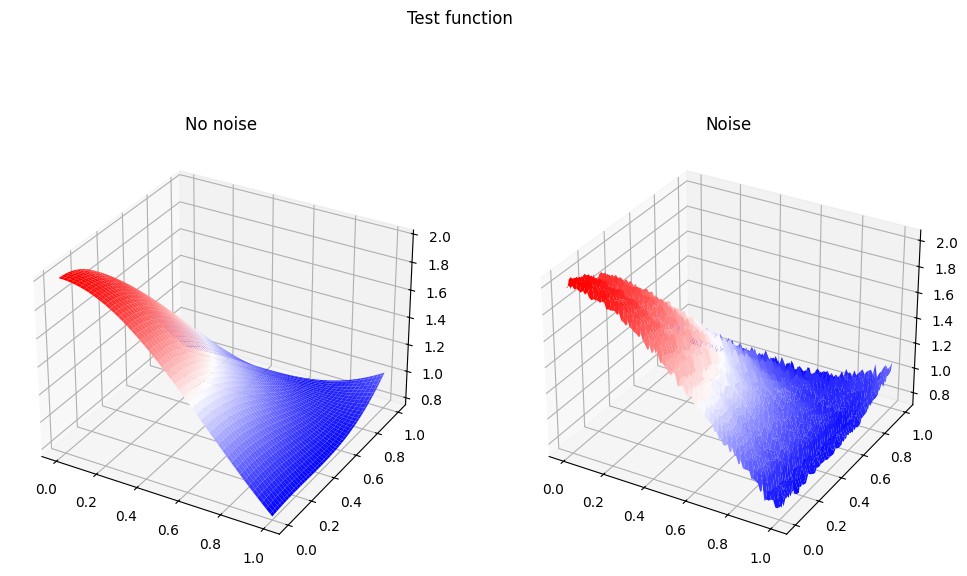

In [4]:
# Domain
x0,xN = 0, 1
y0,yN = 0, 1
N = 100
x = np.linspace(x0,xN,N)
y = np.linspace(y0,yN,N)
x_n = np.random.randn(N)
y_n = np.random.randn(N)
noise_x,noise_y = np.meshgrid(x_n,y_n)
xx,yy = np.meshgrid(x,y)
xx_1,yy_1 = np.meshgrid(x_n,y_n)
#Z = Franke(xx,yy,noise_x,noise_y,noise=0.0)
Z = exp2D(xx,yy,noise_x,noise_y,2,5.5,noise=0.0)
Z_1 = exp2D(xx,yy,noise_x,noise_y,2,5.5,noise=0.02)
# Plotting initial data
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(121,projection='3d')
bx = fig.add_subplot(122,projection='3d')
f1 = ax.plot_surface(xx,yy,Z,cmap='bwr')
f2 = bx.plot_surface(xx,yy,Z_1,cmap='bwr')
fig.suptitle('Test function')
ax.set_title('No noise'); bx.set_title('Noise'); plt.show()

### Part a) OLS - analysis
#### 1D - case, simple exponential

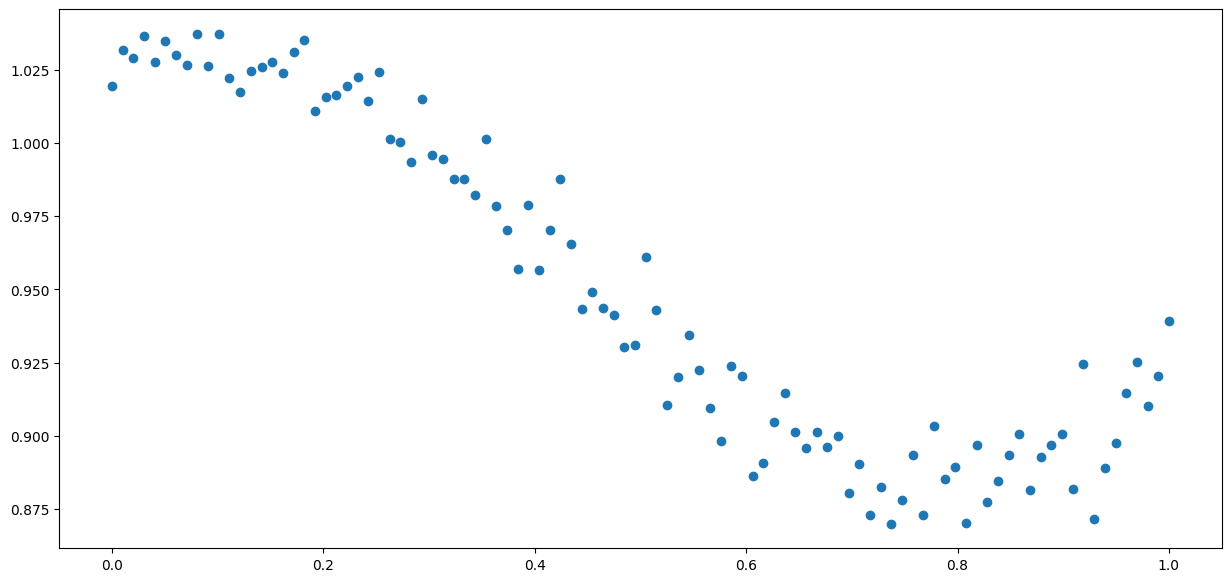

In [5]:
y = exp1D(x,x_n,1.0,1.5,0.01)
fig,ax = plt.subplots(1,1)
ax.scatter(x,y)
plt.show()

Error metrics
MSE (Own):
Training: 0.00582164 | Test: 0.00498841
MSE (Scikit):
Training: 0.00582164 | Test: 0.00498841
R² (Own):
Training: -0.76627 | Test: -0.902538
R² (Scikit):
Training: -0.76627 | Test: -0.902538


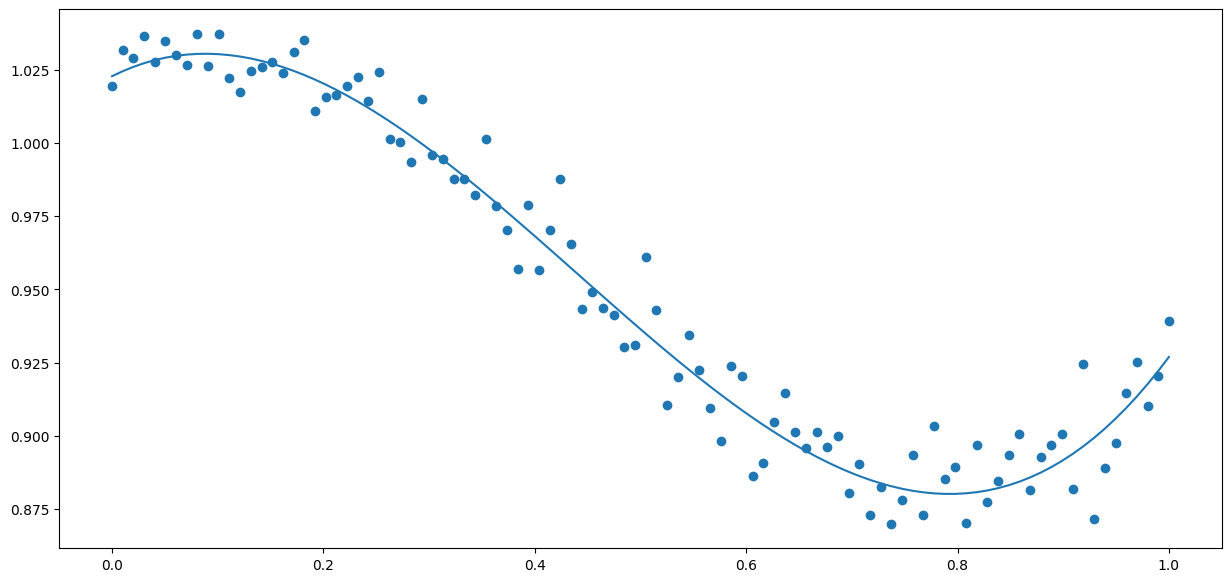

In [6]:
X = poly_model_1d(x,3)
y_p_train, y_p_test, betas = OLS(y_data=y,X=X,split=True,scaling=True)

y_p = betas[0]
for i in range(0,len(betas[1])):
    y_p += betas[1][i]*x**[i+1]

fig,ax = plt.subplots(1,1)
ax.scatter(x,y)
ax.plot(x,y_p)
plt.show()

#### 2D - exponential case

In [7]:
x0,xN = 0, 1
y0,yN = 0, 1
N = 100
x = np.linspace(x0,xN,N)
y = np.linspace(y0,yN,N)
x_n = np.random.randn(N)
y_n = np.random.randn(N)
noise_x,noise_y = np.meshgrid(x_n,y_n)
xx,yy = np.meshgrid(x,y)
z = exp2D(xx,yy,noise_x,noise_y,2,5.5,noise=0.02)

X = poly_model_2d(x,y,2)

y_p_train, y_p_test, betas = OLS(y_data=z,X=X,split=True,scaling=True)


Error metrics
MSE (Own):
Training: 1.97745e+31 | Test: 3.10205e+31
MSE (Scikit):
Training: 1.97745e+31 | Test: 3.10205e+31
R² (Own):
Training: -1.64173e+32 | Test: -2.28403e+32
R² (Scikit):
Training: -7.93815e+33 | Test: -9.83686e+33


### Part b)


### Part c)


### Part d)


### Part e)


### Part f)


### Part g)